# Parsing energy dependent, angle integrated quantities

In [1]:
import exfor_tools

Using database version x4i3_X4-2023-04-29 located in: /mnt/ffs24/home/beyerkyl/local_conda_pkgfiles/envs/exft/lib/python3.14/site-packages/x4i3/data


In [2]:
import jitr

## We can use the `TotalReaction` object to specify that we want the total cross cross section

In [3]:
#NBVAL_CHECK_OUTPUT

entry = exfor_tools.ExforEntry(
    entry="10817",
    reaction=jitr.reactions.Reaction(
        target=(120, 50),
        projectile=(1, 0),
        process="tot",
    ),
    quantity="XS",
    vocal=True,
)

Found subentry 10817003 with the following columns:
['EN', 'DATA', 'DATA-ERR']


In [4]:
#NBVAL_CHECK_OUTPUT

len(entry.measurements)

1

In [5]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, '$^{120} \\rm{Sn}(n,tot)$')

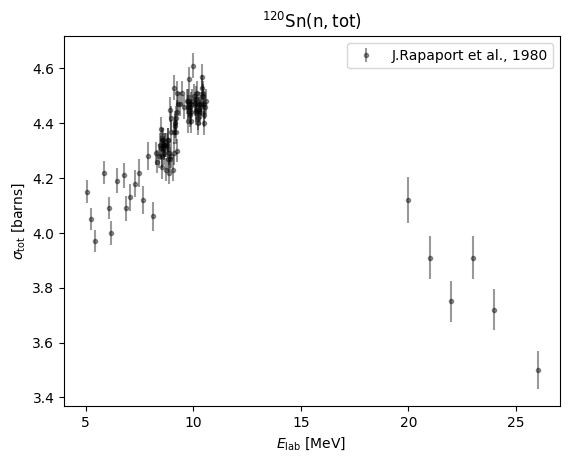

In [6]:
m = entry.measurements[0]
label = f"{entry.meta.author[0]} et al., {entry.meta.year}"
plt.errorbar(
    m.x,
    m.y,
    m.statistical_err,
    linestyle="None",
    marker=".",
    color="k",
    alpha=0.4,
    label=label,
)
plt.legend()
plt.xlabel(r"$E_{\text{lab}}$" + f" [{m.x_units}] ")
plt.ylabel(r"$\sigma_{\text{tot}}$" + f" [{m.y_units}]")
plt.title(f"${entry.reaction.reaction_latex}$")

[Pruitt, et al., 2020](http://dx.doi.org/10.1103/PhysRevC.102.034601) is a nice modern source for (n,total) cross section measurements.

However, `jitr` cannot specify reactions on natural targets (it's a solver, so it needs specific isotopes. To run it for a natural target, one would need to manually weighted average by abundance over the relevant isotopes). There is a lightweight version of the `Reaction` class in `exfor_tools` that can properly query data for natural isotopes. In EXFOR, setting $A=0$ indicates a natural isotope.

In [7]:
targets = [
    (0, 50),
    (124, 50),
    (112, 50),
    (0, 82),
]

In [8]:
#NBVAL_CHECK_OUTPUT

data = []
for target in targets:
    data.append(
        exfor_tools.ExforEntry(
            entry="14661",
            reaction=exfor_tools.reaction.Reaction(
                target=target,
                projectile=(1, 0),
                process="tot",
            ),
            quantity="XS",
            vocal=True,
        )
    )

Found subentry 14661002 with the following columns:
['EN', 'EN-RSL', 'DATA', 'ERR-S', 'ERR-SYS']
Found subentry 14661003 with the following columns:
['EN', 'EN-RSL', 'DATA', 'ERR-S', 'ERR-SYS']
Found subentry 14661004 with the following columns:
['EN', 'EN-RSL', 'DATA', 'ERR-S', 'ERR-SYS']
Found subentry 14661015 with the following columns:
['EN', 'EN-RSL', 'DATA', 'ERR-S', 'ERR-SYS']


In [9]:
#NBVAL_CHECK_OUTPUT

for d in data:
    print(f"{len(d.measurements)} measurements for {d.reaction}")

1 measurements for Sn-0(N,tot)
1 measurements for Sn-124(N,tot)
1 measurements for Sn-112(N,tot)
1 measurements for Pb-0(N,tot)


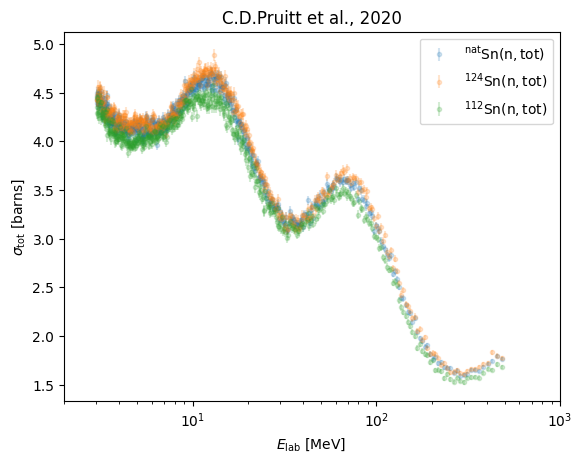

In [10]:
for d in data[:-1]:
    m = d.measurements[0]
    label = f"${d.reaction.reaction_latex}$"
    plt.errorbar(
        m.x,
        m.y,
        m.statistical_err,
        linestyle="None",
        marker=".",
    #    color="k",
        alpha=0.2,
        label=label,
    )
    plt.legend()
    plt.xlabel(r"$E_{\text{lab}}$" + f" [{m.x_units}] ")
    plt.ylabel(r"$\sigma_{\text{tot}}$" + f" [{m.y_units}]")
    plt.title(f"{d.meta.author[0]} et al., {d.meta.year}")
    plt.xscale("log")
    plt.xlim([2,1000])

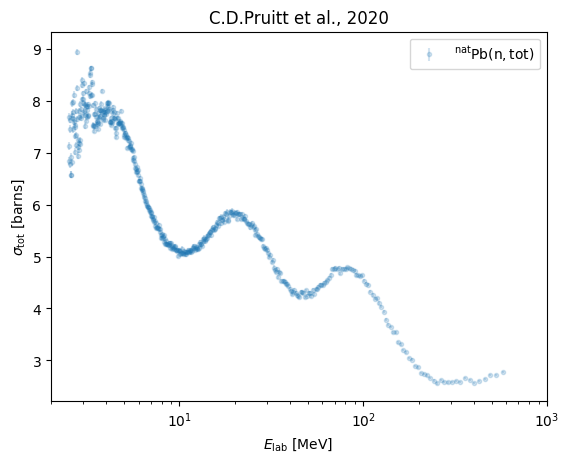

In [11]:
for d in data[-1:]:
    m = d.measurements[0]
    label = f"${d.reaction.reaction_latex}$"
    plt.errorbar(
        m.x,
        m.y,
        m.statistical_err,
        linestyle="None",
        marker=".",
    #    color="k",
        alpha=0.2,
        label=label,
    )
    plt.legend()
    plt.xlabel(r"$E_{\text{lab}}$" + f" [{m.x_units}] ")
    plt.ylabel(r"$\sigma_{\text{tot}}$" + f" [{m.y_units}]")
    plt.title(f"{d.meta.author[0]} et al., {d.meta.year}")
    plt.xscale("log")
    plt.xlim([2,1000])